In [1]:
import pandas as pd
import pandas as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [2]:
!pip install wordcloud

In [3]:
!pip install pandas

In [4]:
!pip install numpy

In [5]:
df = pd.read_csv("sms-spam(in) (1).csv", encoding='Windows-1252')

In [6]:
pip install chardet


Note: you may need to restart the kernel to use updated packages.


In [7]:
import chardet

with open("sms-spam(in) (1).csv", 'rb') as file:
    result = chardet.detect(file.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7257971165545478, 'language': ''}


In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [10]:
df.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3369,ham,Most of the tiime when i don't let you hug me ...,NaN,NaN,NaN


In [11]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [12]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [13]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [15]:
df.rename(columns={'v1':'result','v2':'input'},inplace=True)

In [16]:
df.head()

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['result'].value_counts()


result
ham     4825
spam     747
Name: count, dtype: int64

In [18]:
df.isnull().sum()

result    0
input     0
dtype: int64

In [19]:
df.duplicated().sum()

403

In [20]:
df=df.drop_duplicates()

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

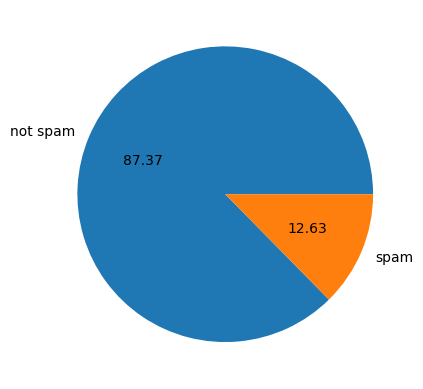

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['result'].value_counts(),labels=['not spam','spam'],autopct='%0.2f')
plt.show()

In [24]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [25]:
import nltk

In [26]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_

True

In [27]:
df = df.replace({"ham": 0, "spam": 1})
df = df.infer_objects(copy=False)


C:\Users\Acer\AppData\Local\Temp\ipykernel_8524\2777462214.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"ham": 0, "spam": 1})


In [28]:
df.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words("english")

def transform_text(text):
    useful_words = []
    text = text.lower() 
    words = nltk.word_tokenize(text) 
    
    for word in words:
        if word.isalnum() and word not in stop_words:
            useful_words.append(word)
    
    return ' '.join(useful_words) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
text = "This is a sample message! Let's test this text processing function."
transformed_text = transform_text(text)
print(transformed_text)


sample message let test text processing function


In [31]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize


# Add columns for character, word, and sentence counts
df['countCharacters'] = df['input'].apply(len)
df['countWords'] = df['input'].apply(lambda i: len(word_tokenize(i)))
df['countSentences'] = df['input'].apply(lambda i: len(sent_tokenize(i)))

print(df)


      result                                              input  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      countCharacters  countWords  countSentences  
0                 111          24               2  
1                  29           8               2  
2                 155          37      

In [33]:
df.head()

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
df[df['result'] == 0][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
df[df['result'] == 1][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

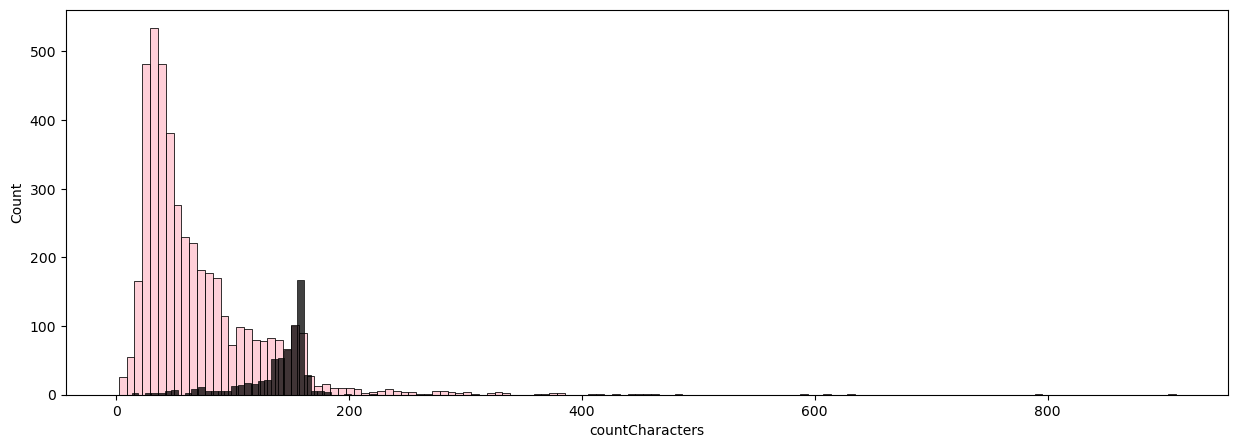

In [37]:
plt.figure(figsize = (15, 5))
sns.histplot(df[df['result'] == 0]['countCharacters'], color = "pink")
sns.histplot(df[df['result'] == 1]['countCharacters'], color = "black")


<Axes: xlabel='countWords', ylabel='Count'>

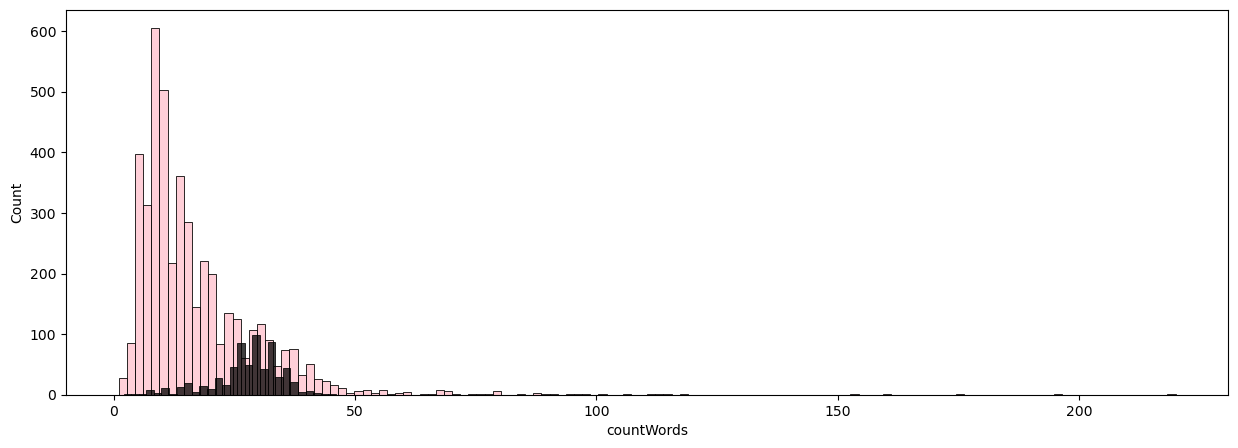

In [38]:
plt.figure(figsize = (15, 5))
sns.histplot(df[df['result'] == 0]['countWords'], color = "pink")
sns.histplot(df[df['result'] == 1]['countWords'], color = "black")

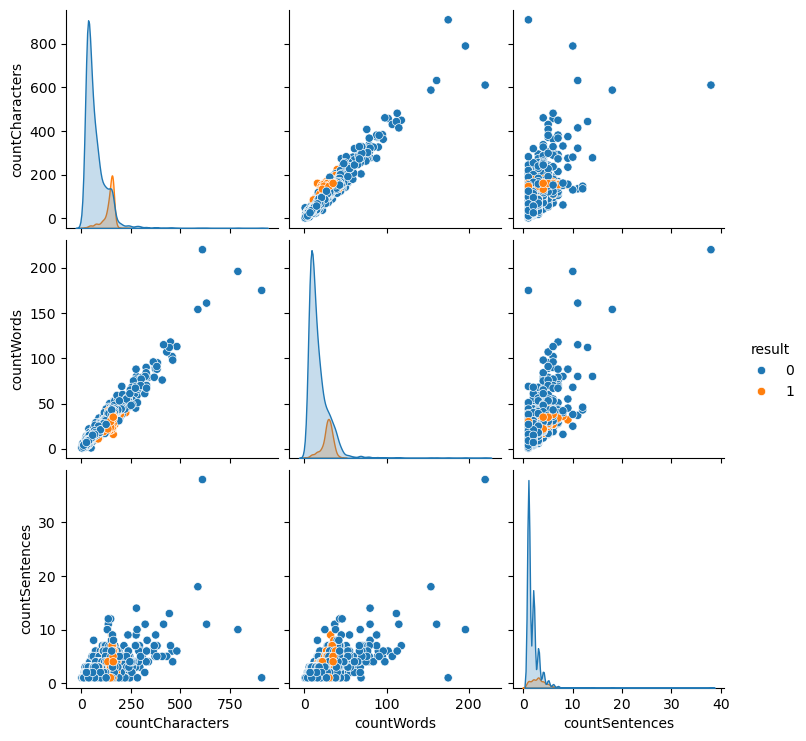

In [39]:
sns.pairplot(df, hue='result')

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
def transform_text (text):
    
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)
            
    
    text = removedSC[:]
    
    
    removedSWPC = list()
    for i in text:
        
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSWPC.append(i)
            
    
    text = removedSWPC[:]
    
    ps = PorterStemmer()
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))
    text = stemmed[:]
    return " ".join(text)

In [42]:
df['processed'] = df['input'].apply(transform_text)

df.head()

,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

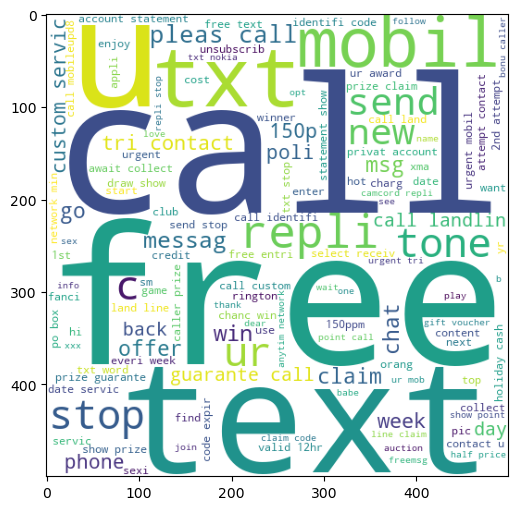

In [44]:
spamWC = wc.generate(df[df['result'] == 1]['processed'].str.cat(sep=" "))

plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

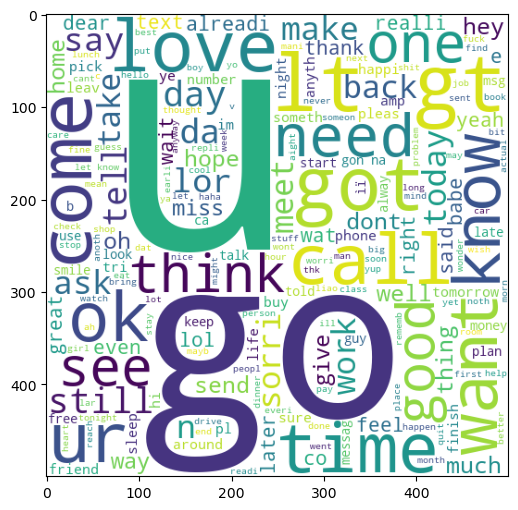

In [45]:
spamWC = wc.generate(df[df['result'] == 0]['processed'].str.cat(sep=" "))

plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

In [46]:
#extracting all the words used in SPAM messages
spamWords = list()

for msg in df[df['result'] == 1]['processed'].tolist():
  for word in msg.split():
    spamWords.append(word)

spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [47]:
spamWordsDictionary = Counter(spamWords)

spamWordsDictionary.most_common(40)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

In [48]:
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

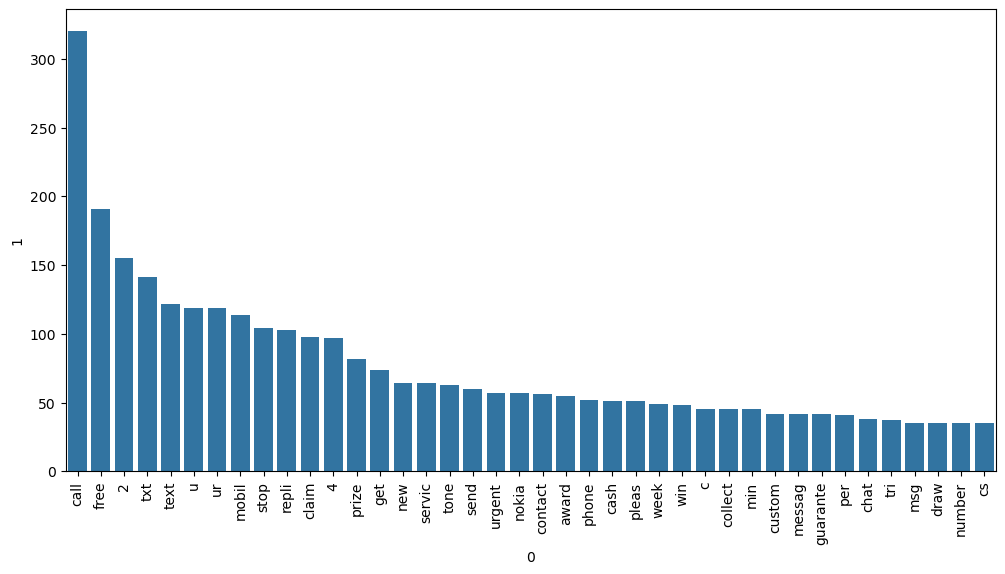

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [50]:
cv = CountVectorizer()

In [51]:
X = cv.fit_transform(df['processed']).toarray()

In [52]:
X.shape

(5169, 6708)

In [53]:
y = df['result'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [55]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [56]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.960348162475822
[[869  30]
 [ 11 124]]
0.8051948051948052


In [57]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.7562862669245648
[[648 251]
 [  1 134]]
0.34805194805194806


In [58]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [59]:
import pickle

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()


In [61]:
pickle.dump(tf,open('model.pkl','wb'))

In [62]:
pickle.dump(tf,open('vectorizer.pkl','wb'))

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tf = TfidfVectorizer()

In [64]:
import os
print(os.getcwd())


C:\Users\Acer\SMS-SPAM-DETECTION


In [65]:
import sklearn
print(sklearn.__version__)


1.5.1


In [66]:
import os
print(os.getcwd())

C:\Users\Acer\SMS-SPAM-DETECTION


In [67]:
import os

file_path = "model.pkl"  # Replace with the path to your .pkl file

# Check if the file exists
if os.path.exists(file_path):
    # Check if the file has read permission
    if os.access(file_path, os.R_OK):
        print(f"The file '{file_path}' has read permission.")
    else:
        print(f"The file '{file_path}' does NOT have read permission.")
else:
    print(f"The file '{file_path}' does not exist.")

The file 'model.pkl' has read permission.


In [68]:
import pickle

file_path = "C:\\Users\\Acer\\SMS-SPAM-DETECTION\\model.pkl"

try:
    with open(file_path, 'rb') as file:  # Use 'rb' for binary read mode
        model = pickle.load(file)
    print("Model loaded successfully!")
except pickle.UnpicklingError:
    print("Error: The file is not a valid pickle file.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' does not exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Model loaded successfully!


In [69]:
import sklearn
import sys

print("Scikit-learn version:", sklearn.__version__)
print("Python version:", sys.version)


Scikit-learn version: 1.5.1
Python version: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [70]:
import os
print(os.getcwd())  # Ensure this directory contains model.pkl

C:\Users\Acer\SMS-SPAM-DETECTION


In [71]:
model = pickle.load(open(r"C:\Users\Acer\SMS-SPAM-DETECTION\model.pkl", 'rb'))

In [72]:
model

TfidfVectorizer()

In [73]:
import os

file_path = r"C:\Users\Acer\SMS-SPAM-DETECTION\model.pkl"  # Replace with the actual path
if os.path.exists(file_path):
    print("File exists!")
else:
    print("File does not exist!")


File exists!


In [74]:
with open(r"C:\Users\Acer\SMS-SPAM-DETECTION\model.pkl", 'rb') as f:
    data = f.read()
    print("File read successfully!")

File read successfully!


In [75]:
model = pickle.load(open(r"C:\Users\Acer\SMS-SPAM-DETECTION\model.pkl", 'rb'))
print("Model loaded successfully!")


Model loaded successfully!


In [76]:
test_text = "This is a sample spam message!"
print(transform_text(test_text))


sampl spam messag


In [77]:
import pickle

tk = pickle.load(open("vectorizer.pkl", "rb"))

In [78]:
print(type(tk))


<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


In [79]:
import pandas as pd
df = pd.read_csv("sms-spam(in) (1).csv", encoding='Windows-1252')




In [80]:
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Extract the text data (replace 'text_column' with your actual column name)
text_data = df['v2']

# Create and fit the TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(text_data)

# Save the fitted vectorizer
with open("vectorizer.pkl", "wb") as file:
    pickle.dump(tfidf, file)


In [82]:
# Load the saved vectorizer
tk = pickle.load(open("vectorizer.pkl", "rb"))

# Check if it has been fitted (vocabulary_ should exist)
print("Vocabulary size:", len(tk.vocabulary_))


Vocabulary size: 8673


In [83]:
import pickle


try:
    tk = pickle.load(open("vectorizer.pkl", 'rb'))
    print("vectorizer.pkl loaded successfully!")
except Exception as e:
    print("Error loading vectorizer.pkl:", e)

# Test model.pkl
try:
    model = pickle.load(open("model.pkl", 'rb'))
    print("model.pkl loaded successfully!")
except Exception as e:
    print("Error loading model.pkl:", e)


vectorizer.pkl loaded successfully!
model.pkl loaded successfully!


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

# Load vectorizer and model
with open('vectorizer.pkl', 'rb') as vec_file, open('model.pkl', 'rb') as model_file:
    vectorizer = pickle.load(vec_file)  # This is your TfidfVectorizer
    model = pickle.load(model_file)      # This should be a trained model (e.g., LogisticRegression)


In [85]:
print(type(model))  # Add this line before calling model.predict


<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


In [86]:
import pickle

In [87]:
with open('vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)

In [88]:
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

# Training data
X_train = ["Free entry in a contest", "Your account is compromised", "Hello, how are you?"]
y_train = [1, 1, 0]  # Spam = 1, Not Spam = 0

# Create and fit TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_transformed, y_train)

# Save the vectorizer and the model
with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [90]:
print(type(vectorizer))  # Should be TfidfVectorizer
print(type(model))       # Should be your classifier (e.g., LogisticRegression)


<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
<class 'sklearn.linear_model._logistic.LogisticRegression'>
